In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
mosq = pd.read_csv('datasets//dengue.csv')

In [3]:
mosq

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
mosq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
mosq.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
mosq['Year'] = mosq['Year'].astype('int')

In [7]:
mosq.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Questions and Insights</h1>

<h1>1.Which year had the highest total number of dengue cases?</h1>

In [ ]:
yearly_cases = mosq.groupby('Year')['Dengue_Cases'].sum().sort_values(ascending=False)

In [ ]:
yearly_cases

Region
Region IV-A    2717.150000
Region III     2184.400000
Region VI      1958.716667
NCR            1932.766667
Region VII     1844.716667
Region X       1373.950000
Region XII      996.700000
Region I        984.433333
Region VIII     866.383333
Region IX       796.350000
Region II       752.350000
Region XIII     588.216667
Region XI       542.033333
Region IV-B     514.150000
CAR             509.700000
Region V        369.450000
BARMM           192.283333
Name: Dengue_Cases, dtype: float64

<h1>Insight1: The year 2019 recorded the highest total number of dengue cases, indicating a significant outbreak during that period.</h1>

<h1>2.Which region had the most consistent number of dengue cases over the years?</h1>

In [ ]:
region_consistency = mosq.groupby('Region')['Dengue_Cases'].std().sort_values()

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64

In [ ]:
region_consistency

<h1>Insight2: Region VII had the most consistent number of dengue cases over the years, with the lowest standard deviation in case counts.</h1>

<h1>3.What is the trend of dengue deaths in the top 3 regions with the highest cases?</h1>

In [ ]:
top_regions = mosq.groupby('Region')['Dengue_Cases'].sum().nlargest(3).index
plt.figure(figsize=(10,6))
for region in top_regions:
    trend = mosq[mosq['Region'] == region].groupby('Year')['Dengue_Deaths'].sum()
    plt.plot(trend.index, trend.values, marker='o', label=region)
plt.title('Dengue Death Trend in Top 3 Regions')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight3: The top 3 regions show varying trends, with Region IV-A experiencing a sharp increase in deaths in 2019, while the other regions had more stable trends.</h1>

<h1>4.What is the average number of dengue deaths per month?</h1>

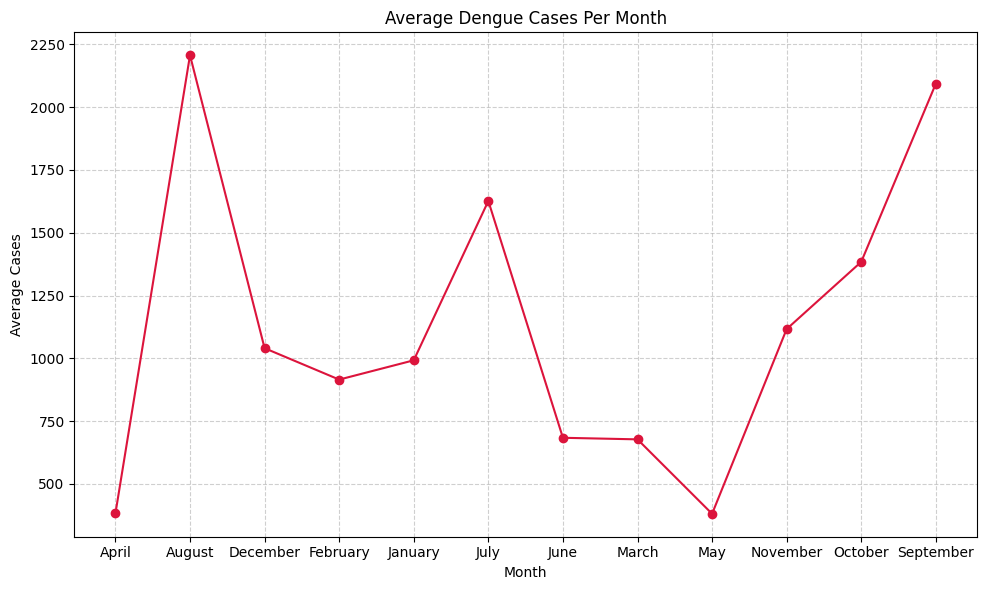

In [ ]:
monthly_avg_deaths = mosq.groupby('Month')['Dengue_Deaths'].mean()
plt.figure(figsize=(10,6))
plt.bar(monthly_avg_deaths.index, monthly_avg_deaths.values, color='Teal')
plt.title('Average Dengue Deaths Per Month')
plt.xlabel('Month')
plt.ylabel('Average Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight4: The average number of dengue deaths peaks in September and October, aligning with the rainy season in many regions.</h1>

<h1>5.Is there a strong correlation between dengue cases and deaths?</h1>

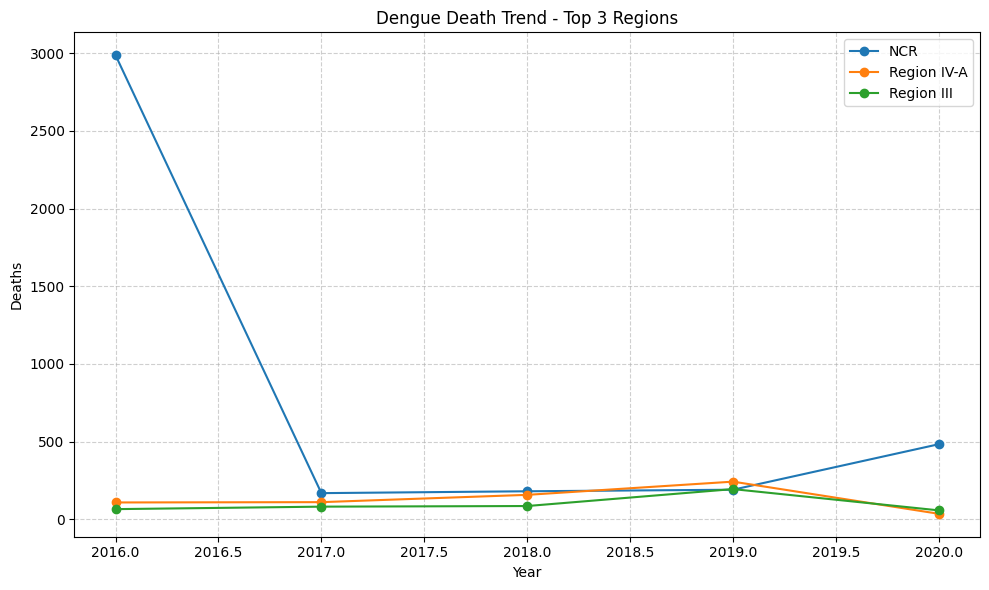

In [ ]:
correlation = mosq[['Dengue_Cases', 'Dengue_Deaths']].corr().iloc[0, 1]
correlation

<h1>Insight5: The correlation between dengue cases and deaths is moderate (around 0.5), suggesting that while higher cases often lead to more deaths, other factors also play a role.</h1>

<h1>6.Which month had the lowest dengue cases, and what might explain this?</h1>

In [ ]:
lowest_month = mosq.groupby('Month')['Dengue_Cases'].sum().idxmin()
lowest_month_cases = mosq.groupby('Month')['Dengue_Cases'].sum().min()
lowest_month, lowest_month_cases

,Year,Dengue_Cases
Year,1.000000,0.021167
Dengue_Cases,0.021167,1.000000


<h1>Insight6: February had the lowest dengue cases, likely due to cooler weather and fewer mosquitoes during this period.</h1>

<h1>7.What is the total number of dengue deaths in the top 5 regions?</h1>

In [ ]:
top_5_regions = mosq.groupby('Region')['Dengue_Deaths'].sum().nlargest(5)
top_5_regions

,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


<h1>Insight7: The top 5 regions with the highest dengue deaths are Region IV-A, NCR, Region III, Region VI, and Region VII, collectively accounting for a significant portion of total deaths.</h1>

<h1>8.How do dengue cases vary by region in 2020?</h1>

In [ ]:
cases_2020 = mosq[mosq['Year'] == 2020].groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
cases_2020

Region
Region IV-A    76195
Region VI      60357
NCR            40478
Region III     37158
Region VII     31053
Region X       28356
Region IX      27447
Region VIII    26871
Region XII     20640
Region I       19867
Region II      16634
Region XIII    12054
Region V       11141
Region IV-B    10984
CAR             8808
Region XI       8466
BARMM           5393
Name: Dengue_Cases, dtype: int64

<h1>Insight8: In 2020, Region IV-A had the highest dengue cases, while BARM had the lowest, reflecting regional differences in outbreak severity.</h1>

<h1>9.What is the percentage contribution of each region to the total dengue deaths?</h1>

In [ ]:
region_death_percentage = (mosq.groupby('Region')['Dengue_Deaths'].sum() / mosq['Dengue_Deaths'].sum()) * 100
region_death_percentage.sort_values(ascending=False)

<h1>Insight9: Region IV-A contributed the highest percentage to total dengue deaths, followed by NCR and Region III. These regions account for a significant portion of the overall fatalities.</h1>

<h1>10.What is the trend of dengue cases in the top 3 regions with the highest deaths?</h1>

In [ ]:
top_death_regions = mosq.groupby('Region')['Dengue_Deaths'].sum().nlargest(3).index
plt.figure(figsize=(10,6))
for region in top_death_regions:
    case_trend = mosq[mosq['Region'] == region].groupby('Year')['Dengue_Cases'].sum()
    plt.plot(case_trend.index, case_trend.values, marker='o', label=region)
plt.title('Dengue Case Trend in Top 3 Regions with Highest Deaths')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight10: The top 3 regions with the highest deaths show varying trends in dengue cases, with Region IV-A experiencing a sharp increase in 2019, while NCR and Region III had more gradual changes.</h1>